In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import pandas as pd
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg


Importing libraries:

NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

Using Matplotlib, you can draw lots of cool graphs as per your data like Bar Chart, Scatter Plot, Histograms, Contour Plots, Box Plot, Pie Chart, etc.

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

ImageDataGenerator:
Image data augmentation is used to expand the training dataset in order to improve the performance and ability of the model to generalize. Image data augmentation is supported in the Keras deep learning library via the ImageDataGenerator class. How to use shift, flip, brightness, and zoom image data augmentation

Keras:
Keras is an open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library.

Sequential:
A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. A Sequential model is not appropriate when: Your model has multiple inputs or multiple outputs. Any of your layers has multiple inputs or multiple outputs.

2D convolution layer:
This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.

Activation:
Applies an activation function to an output.

Maxpooling2D:
Max pooling operation for 2D spatial data. Downsamples the input representation by taking the maximum value over the window defined by pool_size for each dimension along the features axis. The window is shifted by strides in each dimension.

Flatten:
The role of the Flatten layer in Keras is super simple: A flatten operation on a tensor reshapes the tensor to have the shape that is equal to the number of elements contained in tensor non including the batch dimension. Note: I used the model. summary() method to provide the output shape and parameter details.

Dense:
Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer. Dense layer does the below operation on the input and return the output.

In [ ]:
test_dir="C:/Users/97798/Desktop/AI/DIY/dataset/test"
train_dir="C:/Users/97798/Desktop/AI/DIY/dataset/train"

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

The ImageDataGenerator class has three methods flow(), flow_from_directory() and flow_from_dataframe() to read the images from a big numpy array and folders containing images.

flow_from_directory:

The directory must be set to the path where your ‘n’ classes of folders are present.

The target_size is the size of your input images, every image will be resized to this size.

color_mode: if the image is either black and white or grayscale set “grayscale” or if the image has three color channels, set “rgb”.

batch_size: No. of images to be yielded from the generator per batch.

class_mode: Set “binary” if you have only two classes to predict, if not set to“categorical”, in case if you’re developing an 

Autoencoder system, both input and the output would probably be the same image, for this case set to “input”.

shuffle: Set True if you want to shuffle the order of the image that is being yielded, else set False.

seed: Random seed for applying random image augmentation and shuffling the order of the image.

In [ ]:
batch_size = 64

training_set = train_datagen.flow_from_directory(train_dir,
target_size = (100, 100),
batch_size = batch_size,
color_mode='rgb',
class_mode = 'binary',
shuffle=True)


test_set = test_datagen.flow_from_directory(test_dir,
target_size = (100, 100),
batch_size = batch_size,
color_mode='rgb',
class_mode = 'binary')

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Many models in the CNN, the sequential model is one of them uesd by us for the classification of the planes and cars. First the image width and height 100*100 image pixels and the datasets contains the images of the planes and cars where the train datasets and test datasets has already been separated are stored in the directories i.e. train_dir as training datasets(contains 400 images) and val_dir as testing datasets(contains 100 images).

Here,for training the model we have set the parameters which are passed like epoch as 20 and batch_size as 64. Keras also provides tools for reshaping the loaded photo into the preferred size for the model (e.g. 3 channel 100 x 100 pixel image).Sequential Model has been loaded where the conv2D has been set or added to (32, (3, 3), input_shape = (100,100,3)), activation as relu which will output into range of (0 to x) and the pool size as (3,3).

Referencing from image Keras ImageDatagenerator source code, every pixel has been multiplied through the parameter rescale in the preprocessing image. And model has been trained using the binary crossentropy loss function and adam optimizer.
Flatten will convert the data into a 1-dimensional array for inputting it to the next layer i.e creates a single long feature vector.
Dense layer receives an input from all the present in previous layer. we have 64 neurons and output is fire by relu. Another dense layer with 128 neurons is added and output is fire by relu. The dropout layer is to overcome the issue of overfitting, 20 percent of the input values that come with layers is reduced to zero.
In final dense layer 1-dimensionality of the output space with activation sigmoid range ( -1 to 1).. Thish layer is an ANN which is fully connected to maps 64 inputs values of 2 class labels with a sigmoid activation function.

Our model have been saved to directory model.h5 and its weights to directory weights.h5. The function train_datagen.flow_from_directory() reads the images from a big numpy array and folders(train and test) which contain images. Thourgh model.fit_generator() function accepts the batch of data, performs backpropagation, and updates the weights in our model. This process is repeated until we have reached the desired number of epochs.

And the results has shown below as output:

In [ ]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (100, 100, 3)))
classifier.add(Activation("relu"))
classifier.add(MaxPooling2D(pool_size = (3, 3)))

classifier.add(Conv2D(64, (3, 3), input_shape = (100, 100, 3)))
classifier.add(Activation("relu"))
classifier.add(MaxPooling2D(pool_size = (3, 3)))

classifier.add(Flatten())

classifier.add(Dense(64))
classifier.add(Activation("relu")) 
classifier.add(Dense(128))
classifier.add(Activation("relu"))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'sigmoid', units=1))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

In [ ]:
history = classifier.fit_generator(training_set,
                        steps_per_epoch=np.ceil(training_set.samples / batch_size),
                        epochs=20,
                        validation_steps=np.ceil(test_set.samples / batch_size),
                         validation_data=test_set
                        )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
7/7 [==============================] - 2s 288ms/step - loss: 0.6656 - accuracy: 0.5725 - val_loss: 0.5723 - val_accuracy: 0.8300
Epoch 2/20
7/7 [==============================] - 2s 216ms/step - loss: 0.5071 - accuracy: 0.8125 - val_loss: 0.3969 - val_accuracy: 0.8300
Epoch 3/20
7/7 [==============================] - 2s 241ms/step - loss: 0.3681 - accuracy: 0.8500 - val_loss: 0.2711 - val_accuracy: 0.8900
Epoch 4/20
7/7 [==============================] - 2s 239ms/step - loss: 0.3236 - accuracy: 0.8650 - val_loss: 0.2987 - val_accuracy: 0.8800
Epoch 5/20
7/7 [==============================] - 2s 299ms/step - loss: 0.2747 - accuracy: 0.8925 - val_loss: 0.2718 - val_accuracy: 0.9000
Epoch 6/20
7/7 [==============================] - 2s 280ms/step - loss: 0.2607 - accuracy: 0.9050 - val_loss: 0.3491 - val_accuracy: 0.8200
Epoch 7/20
7/7 [==============================] - 2s 248ms/step - loss: 0.2549 - acc

In [ ]:
classifier.save('model.h5')
classifier.save_weights('weights.h5')

# Loss of training model:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


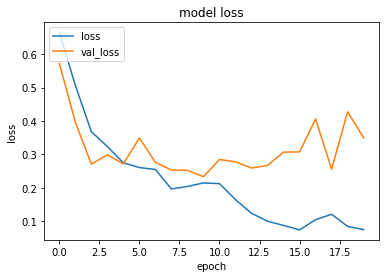

In [ ]:
print(history.history.keys())
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

# ACCURACY OF TRAINING MODEL:

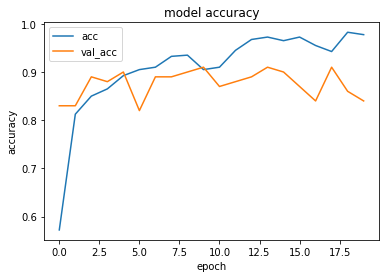

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

# Prediction

Model is tested on both images i.e from other images rather than dataset and also from test dataset. It has predicted accurately on both images as shown below:

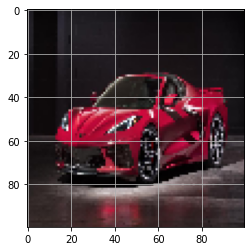

In [ ]:
#test_image = image.load_img("C:/Users/97798/Desktop/AI/DIY/dataset/test/cars/7.jpg", target_size = (100, 100))
test_image = image.load_img("C:/Users/97798/Desktop/AI/1.jpg", target_size = (100, 100))
plt.imshow(test_image)
plt.grid(None) 
plt.show()

In [ ]:
res_list= ["It is car","It is aeroplane"]


In [ ]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)


In [ ]:
print('Output: '+res_list[int(classifier.predict(test_image))])

Output: It is car


In [ ]:
classifier.predict(test_image)

array([[0.]], dtype=float32)

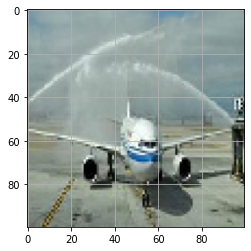

In [ ]:
test_image1 = image.load_img("C:/Users/97798/Desktop/AI/DIY/dataset/test/planes/7.jpg", target_size = (100, 100))
#test_image = image.load_img("C:/Users/97798/Desktop/AI/1.jpg", target_size = (100, 100))
plt.imshow(test_image1)
plt.grid(None) 
plt.show()

In [ ]:
test_image1 = image.img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1, axis = 0)

In [ ]:
print('Output: '+res_list[int(classifier.predict(test_image1))])

Output: It is aeroplane


# ACCURACY AND LOSS OF MODEL

Here, the accuracy and loss of the model has been calculated. And the mispredicted images from the dataset has been calculated.

In [ ]:
Xtrain = classifier.evaluate_generator(training_set)
Xtest = classifier.evaluate_generator(test_set)

Instructions for updating:
Please use Model.evaluate, which supports generators.


In [ ]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(Xtrain[1]*100,Xtrain[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(Xtest[1]*100,Xtest[0]))

Training Accuracy  : 97.25%     Training loss  : 0.074740
Validation Accuracy: 84.00%     Validation loss: 0.349507


In [ ]:
test_set.reset
ytesthat = classifier.predict_generator(test_set)
df = pd.DataFrame({
    'images':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(70)

,images,predict,y,y_pred
0,cars\1.jpg,0.96990,0,1
1,cars\10.jpg,0.00741,0,0
2,cars\11.jpg,0.17482,0,0
3,cars\12.jpg,0.00054,0,0
4,cars\13.jpg,0.00140,0,0
...,...,...,...,...
65,planes\23.jpg,0.26075,1,0
66,planes\24.jpg,0.98678,1,1
67,planes\25.jpg,0.82239,1,1
68,planes\26.jpg,0.98451,1,1


In [ ]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from  Validation images : %d'%misclassified['y'].count())

Total misclassified image from  Validation images : 48


# CONFUSION MATRIX

In [ ]:
# import sklearn.metrics as metrics
# import numpy as numpy

# test_steps_per_epoch = numpy.math.ceil(test_set.samples / test_set.batch_size)
# predictions = classifier.predict_generator(test_set, steps=test_steps_per_epoch)
# predicted_classes = numpy.argmax(predictions, axis=1)

# report = metrics.classification_report(test_set.classes, predicted_classes, target_names=list(test_set.class_indices.keys())  )
# print(report) 

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df.y, df.y_pred))

[[30 20]
 [28 22]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df.y, df.y_pred))

              precision    recall  f1-score   support

           0       0.52      0.60      0.56        50
           1       0.52      0.44      0.48        50

    accuracy                           0.52       100
   macro avg       0.52      0.52      0.52       100
weighted avg       0.52      0.52      0.52       100



1. for 0 class: TP = 30 
    precision= 30/30+28 = 0.52
    recall = 30/30+20 =  0.60
    f1 score =2(recall*precision/recall+precision) =0.56

2. for 1 class: TP = 22
    precision= 22/22+20 = 0.52 
    recall = 22/22+28 =  0.44
    f1 score = 2(recall*precision/recall+precision)= 0.48

3. accuracy= 30+22/100 = 0.52

Plot the ROC curve for the case at hand by importing roc_curve from sklearn.metrics, which gives us the TP and FP rates:

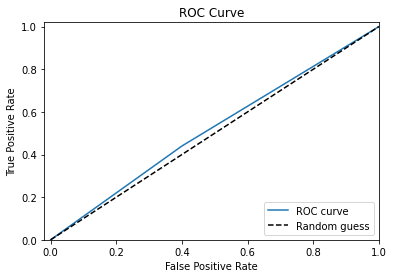

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(df.y, df.y_pred)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

Here are some images of the planes which has been predicted as the cars which has been shown below as output.

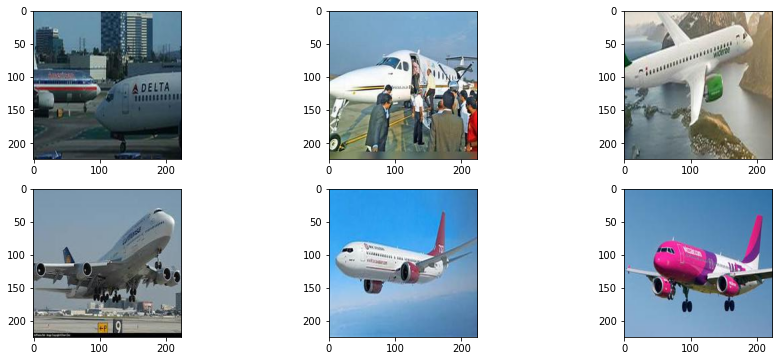

In [ ]:
PLANES = df['images'][(df.y==1)&(df.y_pred==0)]
fig=plt.figure(figsize=(15, 6))
columns = 3
rows = 2
for i in range(columns*rows):
    img = mpimg.imread('C:/Users/97798/Desktop/AI/DIY/dataset/test/'+PLANES.iloc[i])
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()

Here are some images of the cars which has been predicted as the planes which has been shown below as output.

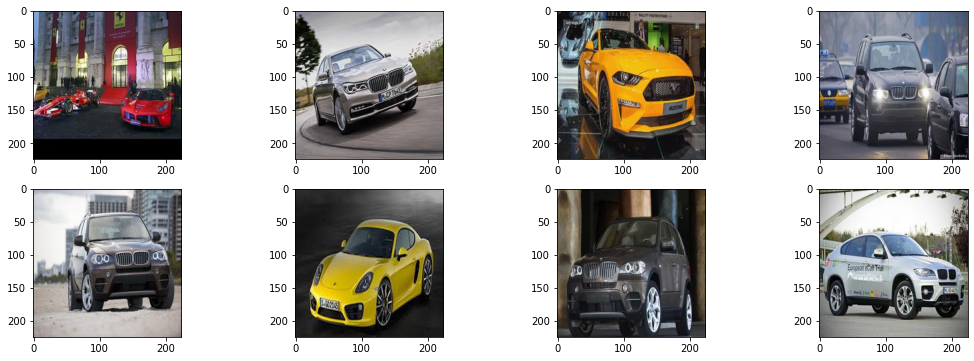

In [ ]:
CARS = df['images'][(df.y==0)&(df.y_pred==1)]
fig=plt.figure(figsize=(18, 6))
columns = 4
rows = 2
for i in range(columns*rows):
    img = mpimg.imread('C:/Users/97798/Desktop/AI/DIY/dataset/test/'+CARS.iloc[i])
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)

plt.show()